# __Tweets Clustering Experiment__

## __Data__

In [1]:
import pandas as pd
from modules import preprocessing as pp

In [2]:
tweets_df = pd.read_parquet('data/tweets/selected_tt_split.parquet')
tweets_df.shape

(1814599, 4)

In [3]:
tweets_df.head()

,author,user_description,tweet,hashtags
0,Indignado72,"“There are no coincidences, only the inevitable”",Cadê a cambada que dizia que era só uma gripez...,[BolsonaroGenocida]
1,EscutaZeNinguem,Mas quando a vida nos violentar\nPediremos ao ...,@seguezaqueu @zaqueusdvPT É porque a PF agora ...,[BolsonaroGenocida]
2,guinody,Só opinião que não vale nada.,@folhape @rbezerrademelo Não haverá segundo tu...,"[BolsonaroGenocida, LulaSocioDoGenocida, CiroA..."
3,guinody,Só opinião que não vale nada.,@HaddadDebochado Não haverá segundo turno.\nNe...,"[BolsonaroGenocida, LulaSocioDoGenocida, CiroA..."
4,Sandroka131,“O Brasil que come não conhece o Brasil que te...,@zehdeabreu @verabr1 Mais de 100 pedidos de im...,"[CPIdaCovid, GenocidaDesgracado]"


### Data Preprocessing

In [4]:
tweets_df['processed_tweet'] = tweets_df['tweet'].map(lambda x: pp.full_processing_pipeline(x))
tweets_df['keep_hashtags_tweet'] = tweets_df['tweet'].map(lambda x: pp.keep_hashtags_pipeline(x))
tweets_df['no_emoji_tweet'] = tweets_df['tweet'].map(lambda x: pp.no_emoji_pipeline(x))
tweets_df.head()

,author,user_description,tweet,hashtags,processed_tweet,keep_hashtags_tweet,no_emoji_tweet
0,Indignado72,"“There are no coincidences, only the inevitable”",Cadê a cambada que dizia que era só uma gripez...,[BolsonaroGenocida],cade cambada dizia gripezinha total casos tota...,cade cambada dizia gripezinha total casos tota...,cade cambada dizia gripezinha total casos tota...
1,EscutaZeNinguem,Mas quando a vida nos violentar\nPediremos ao ...,@seguezaqueu @zaqueusdvPT É porque a PF agora ...,[BolsonaroGenocida],porque pf agora anda ocupada tomando depoiment...,porque pf agora anda ocupada tomando depoiment...,porque pf agora anda ocupada tomando depoiment...
2,guinody,Só opinião que não vale nada.,@folhape @rbezerrademelo Não haverá segundo tu...,"[BolsonaroGenocida, LulaSocioDoGenocida, CiroA...",havera segundo turno agora eleito primeiro tur...,havera segundo turno bolsonarogenocida lulasoc...,havera segundo turno agora eleito primeiro tur...
3,guinody,Só opinião que não vale nada.,@HaddadDebochado Não haverá segundo turno.\nNe...,"[BolsonaroGenocida, LulaSocioDoGenocida, CiroA...",havera segundo turno agora eleito primeiro tur...,havera segundo turno bolsonarogenocida lulasoc...,havera segundo turno agora eleito primeiro tur...
4,Sandroka131,“O Brasil que come não conhece o Brasil que te...,@zehdeabreu @verabr1 Mais de 100 pedidos de im...,"[CPIdaCovid, GenocidaDesgracado]",pedidos impeachment segurados centrao anda qua...,pedidos impeachment segurados centrao cpidacov...,pedidos impeachment segurados centrao anda qua...


## __Clustering__

In [20]:
from wordcloud import WordCloud

### TF-IDF + KMeans

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

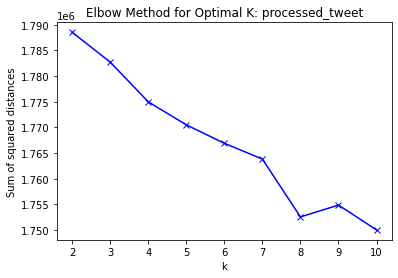

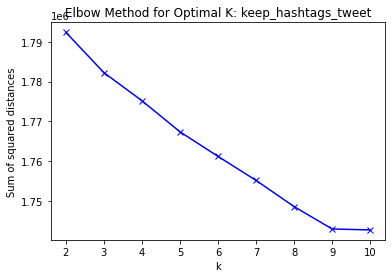

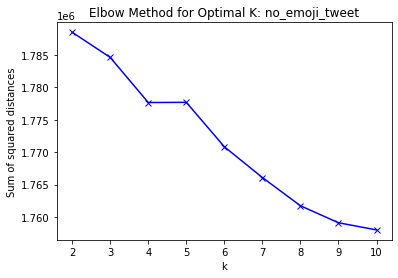

In [9]:
for proc_type in ['processed_tweet', 'keep_hashtags_tweet', 'no_emoji_tweet']:
    vec = TfidfVectorizer()
    vec.fit(tweets_df[proc_type])
    features = vec.transform(tweets_df[proc_type])

    sum_of_squared_distances = []
    for k in range(2,11):
        km = KMeans(n_clusters=k)
        km.fit(features)
        sum_of_squared_distances.append(km.inertia_)

    plt.plot(range(2,11), sum_of_squared_distances, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Sum of squared distances')
    plt.title(f'Elbow Method for Optimal K: {proc_type}')
    plt.show()


In [8]:
vec = TfidfVectorizer()
features = vec.fit_transform(tweets_df['no_emoji_tweet'])
#features = vec.transform(tweets_df[proc_type])

true_k = 5
model = KMeans(n_clusters=true_k)
model.fit(features)
labels = model.labels_

s_counts = pd.Series(labels).value_counts()
s_perc = pd.Series(labels).value_counts(normalize=True).values
for idx, val, perc in zip(s_counts.index, s_counts.values, s_perc):
    print(f'Cluster {idx}: {val} ({perc*100:.2f}%)')

Cluster 0: 1549167 (85.37%)
Cluster 2: 127318 (7.02%)
Cluster 1: 88322 (4.87%)
Cluster 3: 28232 (1.56%)
Cluster 4: 21560 (1.19%)


In [9]:
result = pd.DataFrame({'user': tweets_df['author'], 'tweet': tweets_df['no_emoji_tweet'], 'hashtags':tweets_df['hashtags'] ,'cluster':labels})

In [10]:
for x in range(0, true_k):
    cluster_data = result[result['cluster']==x]
    hashtags_ = []
    for h_list in cluster_data['hashtags']:
        for ht in h_list:
            hashtags_.append(ht)
    s_counts_ = pd.Series(hashtags_).value_counts()[:15]
    s_perc_ = pd.Series(hashtags_).value_counts(normalize=True)[:15]
    print(f'\nCluster {x} top 15 hashtags:\n')
    for idx, val, perc in zip(s_counts_.index, s_counts_.values, s_perc_.values):
        print(f'#{idx}: {val} ({perc*100:.2f}%)')


Cluster 0 top 15 hashtags:

#CPIdaCovid: 463927 (16.76%)
#ForaBolsonaro: 445671 (16.10%)
#ForaBolsonaroGenocida: 121404 (4.39%)
#CPIdaPandemia: 118262 (4.27%)
#RenanVagabundo: 102685 (3.71%)
#CPIdoCirco: 94858 (3.43%)
#RenanSabiaDeTudo: 79682 (2.88%)
#EuAutorizoPresidente: 71034 (2.57%)
#BolsonaroGenocida: 45902 (1.66%)
#CPIdoGenocidio: 41202 (1.49%)
#CPIdaCOVID19: 33715 (1.22%)
#forabolsonaro: 31622 (1.14%)
#COVID19: 22713 (0.82%)
#ImpeachmentBolsonaroUrgente: 19526 (0.71%)
#CPIdaCOVID: 18773 (0.68%)

Cluster 1 top 15 hashtags:

#CPIdaCovid: 31779 (20.40%)
#ForaBolsonaro: 24926 (16.00%)
#ForaBolsonaroGenocida: 7819 (5.02%)
#CPIdaPandemia: 7816 (5.02%)
#CPIdoCirco: 4745 (3.05%)
#RenanVagabundo: 4621 (2.97%)
#BolsonaroGenocida: 3278 (2.10%)
#CPIdoGenocidio: 3090 (1.98%)
#RenanSabiaDeTudo: 3049 (1.96%)
#EuAutorizoPresidente: 2200 (1.41%)
#CPIdaCOVID19: 2097 (1.35%)
#forabolsonaro: 1603 (1.03%)
#ImpeachmentBolsonaroUrgente: 1603 (1.03%)
#CPIdaCOVID: 1349 (0.87%)
#BolsonaroVaiCair: 1245 (

In [11]:
result.query('cluster == 0').sample(15)

,user,tweet,hashtags,cluster
459433,HondaSandra,paulo,"[ForaBolsonaro, ForaBolsonaroGenocida]",0
967256,ZevelosoX,outra vez,[RenanSabiaDeTudo],0
1491703,renatosimoespt,entenda tarifaco energia promovido partir hoje...,"[BolsoCaro, GuedesParasita, ForaBolsonaro, Ene...",0
537553,algodaoS2doce,gabinete paralelo renan afirma existe realidad...,[CPIdoCirco],0
1323474,PORTALGAZETAAM,quebrou sigilos telefonico fiscal bancario tel...,[CPIdaPandemia],0
855141,Helinhi,lula viralizou midia social apagar foto operar...,[ForaBolsonaro],0
1513182,EmanuelleKulig,foda hoje poder postar nada sobre independenci...,"[ForaBolsonaroGenocida, forabozo]",0
362127,awamaia,senadores impacientes pazuzu interrompendo com...,[cpidacovid],0
109225,RafaelRafic,complicado saber existe vacina existe mutirao ...,"[NaBad, COVID19]",0
1802403,Laurbnet,genocida sim,[BolsonaroGenocida],0


In [12]:
result.query('cluster == 1').sample(15)

,user,tweet,hashtags,cluster
739981,LulaDilma5,queiroga vai virar investigado,[CPIdaCovid],1
562150,jbbour,vai ficar inocua,[CPIdoGenocidio],1
1217840,vanesscordeiro,omar vai perder paciencia ta protelando todas ...,[CPIdaCovid],1
951419,KarrJuh,vai dormir,[RenanSabiaDeTudo],1
1719590,FreitasGai,podemos espalhar senao destruidor gramatica va...,[CPIdoCirco],1
1806763,dulcinealisboa,fizeram filho bostanaro tambem iria gargalhar ...,[CPIdaCovid],1
1089474,femoraes,manoooooooooooooooo tentou meter xarope vai sa...,[CPIdaCovid],1
1587428,marinasouza1,vai parar moleque faixa presidencial bolsonaro...,"[foraBolsonaro, ImpeachmentBolsonaroUrgente]",1
1598569,BuarqueThays,cpi horas vai convocar mercador morte pauno je...,"[CPIdaCOVID19, CPIdaPandemia, CPIdaCovid]",1
1172667,MancuzoFilomena,palhacada vai conseguir,[ForaBolsonaro],1


In [13]:
result.query('cluster == 2').sample(15)

,user,tweet,hashtags,cluster
1738156,Ivani_Ivani_I,ta apelando hem fanfarrao provas pra incrimina...,[CPIdoCirco],2
367110,marceloigors,pazuello dizendo preciso conhecimento preparo ...,"[cpidacovid, cpidogenocídio]",2
1283871,franbeats,opa ai telhado vidro senadores devem ganhar tu...,[ForaBolsonaro],2
601172,c3llyane,gente bolsonaro vezes sabe diferenca pra,[ForaBolsonaroGenocida],2
1666410,amandaexaustah,cara da pra trocar renan calheiros contarato a...,[CPIdaCovid],2
1569253,PepperDane1,bangu pra vagabundo,[ForaBolsonaro],2
889899,tteeox,thread boa pra qm ta perdido nessa historia co...,"[BolsonaroVaiCair, BolsonaroCorrupto, Bolsonar...",2
1763536,MissMistery_,dona andreia tava esperando voadora alessandro...,[CPIdaCovid],2
1778455,wilsomarabreu,sera existe alguem consiga explicar objetivo d...,[CPIdaCovid],2
522371,jujuvalentiml,bom dia povo desejaram bolsonaro va pra casa c...,"[ForaBolsonaro, BolsonaroGenocida]",2


In [14]:
result.query('cluster == 3').sample(15)

,user,tweet,hashtags,cluster
1194386,ptribeirao,esperas mim nucleo luciano lepera rede pt curt...,"[3JForaBolsonaro, CPIdaCOVID, RéuConfesso]",3
920001,ptribeirao,bolsonaro esquerda fique casa esquerda revoluc...,"[LulaInocente, LulaPresidente, ForaBolsonaro]",3
1294012,ptribeirao,almas indios assassinados estatua borba gato n...,"[24JForaBolsonaro, CPIdaCOVID, RéuConfesso]",3
1364671,ptribeirao,proximos passos privataria correios nucleo luc...,"[ForaBolsonaro, LulaLivreBrasilLivre]",3
1464687,ptribeirao,reporter ameacado apos revelar hospital pm tes...,"[ForaBolsonaro, LulaLivreBrasilLivre]",3
873047,ptribeirao,queda investimento estrangeiro brasil registra...,"[LulaInocente, LulaPresidente, ForaBolsonaro]",3
1369304,ptribeirao,twitter abre espaco igenas nucleo luciano lepe...,"[DiaDosPovosIndígenas, ForaBolsonaro, LulaLivr...",3
1318047,ptribeirao,plano safra agricultura familiar preco aliment...,"[ForaBolsonaro, LulaLivreBrasilLivre]",3
1290015,ptribeirao,pm lanca bombas gas contra manifestantes final...,"[24JForaBolsonaro, CPIdaCOVID, RéuConfesso]",3
1393595,ptribeirao,petrobras anuncia novo aumento gasolina nessa ...,"[ForaBolsonaro, LulaLivreBrasilLivre]",3


In [15]:
result.query('cluster == 4').sample(15)

,user,tweet,hashtags,cluster
1744478,divaolinda55,bom dia arnaldo,"[NasRuasVoltaLula, ForaBolsonaroGenocida]",4
1741189,Daniel_PCdoB,bom dia brasil hoje dia luta ruas ai preparaca...,"[2OutEuVou, ForaBolsonaro]",4
1478723,kevnrsa,bom dia todos bom dia tomara semana linda amo ...,"[gratiluz, forabolsonaro]",4
962918,lhamadestra,agora vou trabalhar pq nao filho renan calheir...,[RenanSabiaDeTudo],4
1513172,eujuliocesars,bom dia,"[ForaBolsonaroGenocida, ForaGenocida, ForaCorn...",4
1309552,LuisHum513,bom dia karol otimo domingo pra vc,[ForaBolsonaroGenocida],4
760088,coelho_clemente,bom dia bem alto todo mundo ouvir,"[ForaBolsonaro, ForaBolsonaro19J]",4
1511592,FlaviaChocair,bom dia feliz pra todos desejam,"[ForaBolsonaro, BolsonaroNaCadeia]",4
857611,birolirohater,hoje dia,[CPIdaCovid],4
197007,JOAOPDEUS,bom dia brasil,"[RenanVagabundo, RenanVagabundo, RenanVagabundo]",4


In [16]:
#result.query('cluster == 5').sample(15)

In [17]:
#result.query('cluster == 6').sample(15)

In [18]:
#result.query('cluster == 7').sample(15)

In [ ]:
for k in range(0, true_k):
    s = result[result['cluster']==k]
    text = s['tweet'].str.cat(sep=' ')
    text = text.lower()
    text = ' '.join([word for word in text.split()])
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color='white').generate(text)
    print('Cluster : ', k)
    plt.figure(figsize=(12,10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

### Embeddings (Transformers) + KMeans

In [ ]:
from sentence_transformers import SentenceTransformer

#model = SentenceTransformer('adalbertojunior/distilbert-portuguese-cased')
model = SentenceTransformer('distiluse-base-multilingual-cased-v1')

In [ ]:
#embeddings = model.encode(tweets_df['keep_hashtags_tweet'], show_progress_bar=True)
embeddings = model.encode(tweets_df['processed_tweet'], show_progress_bar=True)

In [ ]:
sum_of_squared_distances = []
for k in range(2,11):
   print('Clustering K = ', k)
   km = KMeans(n_clusters=k)
   km.fit(embeddings)
   sum_of_squared_distances.append(km.inertia_)

In [ ]:
plt.plot(range(2,11), sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method for Optimal K')
plt.show()

In [ ]:
true_k = 5
model = KMeans(n_clusters=true_k)
model.fit(features)
labels = model.labels_


s_counts = pd.Series(labels).value_counts()
s_perc = pd.Series(labels).value_counts(normalize=True).values
for idx, val, perc in zip(s_counts.index, s_counts.values, s_perc):
    print(f'Cluster {idx}: {val} ({perc*100:.2f}%)')

In [ ]:
result = pd.DataFrame({'user': tweets_df['author'], 'tweet': tweets_df['keep_hashtags_tweet'], 'hashtags':tweets_df['hashtags'] ,'cluster':labels})

In [ ]:
for x in range(0, true_k):
    cluster_data = result[result['cluster']==x]
    hashtags_ = []
    for h_list in cluster_data['hashtags']:
        for ht in h_list:
            hashtags_.append(ht)
    s_counts_ = pd.Series(hashtags_).value_counts()[:15]
    s_perc_ = pd.Series(hashtags_).value_counts(normalize=True)[:15]
    print(f'\nCluster {x} top 15 hashtags:\n')
    for idx, val, perc in zip(s_counts_.index, s_counts_.values, s_perc_.values):
        print(f'#{idx}: {val} ({perc*100:.2f}%)')